In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


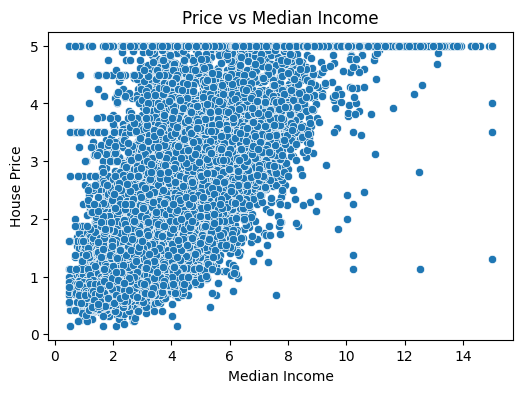

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['MedInc'], y=df['Price'])
plt.title("Price vs Median Income")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.show()


In [16]:
X = df[['MedInc']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


Linear MSE: 0.7091157771765548
Linear R² Score: 0.45885918903846656


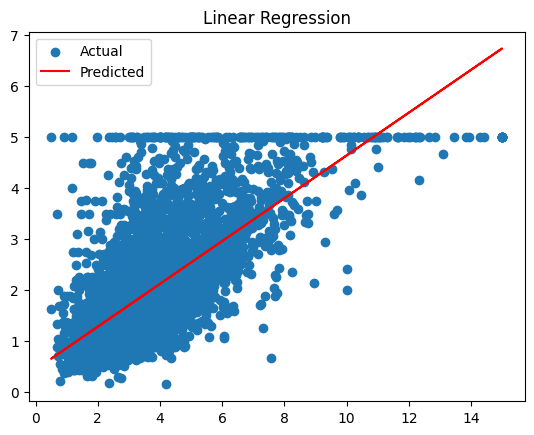

In [18]:
print("Linear MSE:", mean_squared_error(y_test, y_pred))
print("Linear R² Score:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, color='r', label="Predicted")
plt.title("Linear Regression")
plt.legend()
plt.show()


In [23]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

print("Polynomial MSE:", mean_squared_error(y_test, y_poly_pred))
print("Polynomial R² Score:", r2_score(y_test, y_poly_pred))


Polynomial MSE: 0.7032732680932144
Polynomial R² Score: 0.46331772769346224


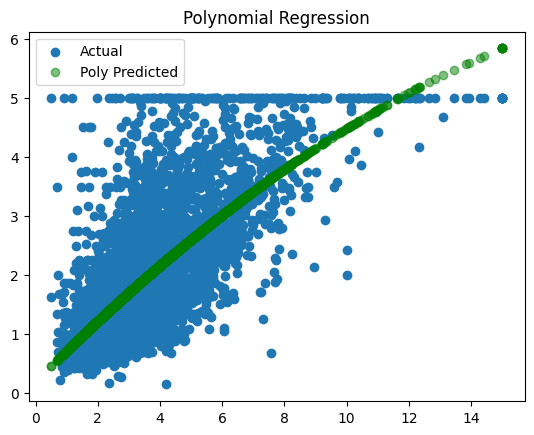

In [24]:
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_poly_pred, color='green', label="Poly Predicted", alpha=0.5)
plt.title("Polynomial Regression")
plt.legend()
plt.show()
